# **TelecomX Challenge – Parte 2**
Notebook desarrollado para el análisis de datos, preprocesamiento y modelado predictivo.

Este documento incluye:
- Exploración inicial de datos (EDA)
- Limpieza y preprocesamiento
- Codificación de variables categóricas
- Entrenamiento de modelos de Machine Learning
- Evaluación y métricas
- Interpretabilidad de modelos
- Exportación de resultados y modelos

**Autor:** Magno Gabriel Huaromo Montañez

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

 # **Preparación de los Datos🛠️**

## **1. Extracción del Archivo Tratado**

In [37]:
PATH = 'https://raw.githubusercontent.com/DevMagnov/Challenge_TelecomX_2_M-Huaromo/refs/heads/main/datos_analisis.csv'  
datos_analisis = pd.read_csv(PATH)
print('Dimensiones:', datos_analisis.shape)
datos_analisis.head()

Dimensiones: (7043, 22)


,Id_Cliente,Abandono,Genero,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Internet_Tipo,...,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## **2. Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [38]:
datos_analisis = datos_analisis.drop('Id_Cliente',axis=1)
datos_analisis.sample()

,Abandono,Genero,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Internet_Tipo,Seguridad_Linea,...,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
2715,0,Male,0,1,1,72,1,1.0,Fiber optic,1.0,...,1.0,0.0,1.0,1.0,One year,1,Bank transfer (automatic),106.1,7848.5,3.536667


In [39]:
datos_analisis.sample(10)

,Abandono,Genero,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Internet_Tipo,Seguridad_Linea,...,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario
2428,1,Female,0,1,0,16,1,1.0,Fiber optic,0.0,...,0.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,100.00,1534.75,3.333333
4479,0,Male,0,1,1,49,1,0.0,DSL,1.0,...,0.0,1.0,0.0,0.0,Month-to-month,0,Credit card (automatic),59.60,2970.30,1.986667
193,0,Female,0,0,0,11,0,NaN,DSL,0.0,...,1.0,1.0,0.0,0.0,One year,1,Credit card (automatic),40.40,422.60,1.346667
6664,0,Male,1,1,0,72,1,1.0,Fiber optic,1.0,...,1.0,1.0,1.0,1.0,Month-to-month,1,Credit card (automatic),112.90,8061.50,3.763333
3434,1,Female,1,0,0,1,1,0.0,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,69.65,69.65,2.321667
3082,0,Male,0,1,1,13,1,0.0,DSL,0.0,...,1.0,1.0,0.0,0.0,Month-to-month,0,Bank transfer (automatic),61.80,750.10,2.060000
100,0,Female,0,0,0,3,1,0.0,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,0,Mailed check,19.95,58.00,0.665000
2457,0,Male,0,1,1,72,1,1.0,Fiber optic,1.0,...,1.0,1.0,1.0,1.0,Two year,1,Credit card (automatic),112.60,8126.65,3.753333
4849,0,Male,0,1,1,69,1,1.0,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,Two year,1,Electronic check,105.00,7297.75,3.500000
6792,0,Male,0,0,0,63,1,0.0,No,NaN,...,NaN,NaN,NaN,NaN,One year,0,Mailed check,20.50,1328.15,0.683333


### **Exploración inicial de datos (EDA)**

In [32]:
# Información general
datos_analisis.info()

# Resumen estadístico de variables numéricas
datos_analisis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Abandono             7043 non-null   int64  
 1   Genero               7043 non-null   object 
 2   Adulto_Mayor         7043 non-null   int64  
 3   Con_Pareja           7043 non-null   int64  
 4   Dependientes         7043 non-null   int64  
 5   Antiguedad           7043 non-null   int64  
 6   Servicio_Telefonico  7043 non-null   int64  
 7   Lineas_Multiples     6361 non-null   float64
 8   Internet_Tipo        7043 non-null   object 
 9   Seguridad_Linea      5517 non-null   float64
 10  Respaldo_Linea       5517 non-null   float64
 11  Proteccion_Equipo    5517 non-null   float64
 12  Soporte_Tecnico      5517 non-null   float64
 13  Tv_Streaming         5517 non-null   float64
 14  Peliculas_Streaming  5517 non-null   float64
 15  Tipo_Contrato        7043 non-null   o

,Abandono,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Seguridad_Linea,Respaldo_Linea,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.467065,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.498953,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [33]:
# Distribución de valores nulos
datos_analisis.isnull().sum().sort_values(ascending=False)

Respaldo_Linea         1526
Soporte_Tecnico        1526
Peliculas_Streaming    1526
Seguridad_Linea        1526
Tv_Streaming           1526
Proteccion_Equipo      1526
Lineas_Multiples        682
Cargo_Total              11
Cargo_Mensual             0
Metodo_Pago               0
Factura_Digital           0
Tipo_Contrato             0
Abandono                  0
Genero                    0
Internet_Tipo             0
Servicio_Telefonico       0
Antiguedad                0
Dependientes              0
Con_Pareja                0
Adulto_Mayor              0
Cargo_Diario              0
dtype: int64

### **Identificación de la variable objetivo (target)**

In [35]:
possible_targets = [c for c in datos_analisis.columns if c.lower() in ['abandono','cancel','cancelled','canceled']]
if not possible_targets:
    raise ValueError('No se detectó columna target')
target_col = possible_targets[0]
print('Variable target:', target_col)
datos_analisis[target_col].value_counts(normalize=True)

Variable target: Abandono


Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64

## **3. Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

Identificación de variables categóricas a codificar:

* Genero (Male/Female)

* Internet_Tipo (DSL / Fiber optic / No)

* Tipo_Contrato (Month-to-month / One year / Two year)

* Metodo_Pago (Electronic check / Mailed check / Credit card (automatic) / Bank transfer (automatic))

In [41]:
# 1) Separar features y target
y = datos_analisis["Abandono"].astype(int)
X = datos_analisis.drop(columns=["Abandono"])

# 2) Listas de columnas
cat_cols = ["Genero", "Internet_Tipo", "Tipo_Contrato", "Metodo_Pago"]
num_cols = [c for c in X.columns if c not in cat_cols]

# 3) Transformadores por tipo
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # drop='first' genera k-1 columnas por variable
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

# 4) ColumnTransformer que aplica a cada grupo
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# 5) Split (¡muy importante antes de fit!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6) Pipeline final con un modelo (ej: Regresión Logística)
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

# 7) Entrenar y evaluar
clf.fit(X_train, y_train)
print("Score (train):", clf.score(X_train, y_train))
print("Score (test):", clf.score(X_test, y_test))

# 8) (Opcional) ver nombres de columnas codificadas
ohe = clf.named_steps["preprocess"].named_transformers_["cat"].named_steps["ohe"]
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

print("Ejemplo de columnas One-Hot:", ohe_feature_names[:10])


Score (train): 0.8103448275862069
Score (test): 0.79649787032655
Ejemplo de columnas One-Hot: ['Genero_Male' 'Internet_Tipo_Fiber optic' 'Internet_Tipo_No'
 'Tipo_Contrato_One year' 'Tipo_Contrato_Two year'
 'Metodo_Pago_Credit card (automatic)' 'Metodo_Pago_Electronic check'
 'Metodo_Pago_Mailed check']


In [43]:
# Identificar columnas categóricas
columnas_categoricas = datos_analisis.select_dtypes(include=['object']).columns
print("Columnas categóricas:", columnas_categoricas)

# Aplicar One-Hot Encoding
df_codificado = pd.get_dummies(datos_analisis, columns=cat_cols, drop_first=True)

# Mostrar primeras filas
print(df_codificado.head())


Columnas categóricas: Index(['Genero', 'Internet_Tipo', 'Tipo_Contrato', 'Metodo_Pago'], dtype='object')
   Abandono  Adulto_Mayor  Con_Pareja  Dependientes  Antiguedad  \
0         0             0           1             1           9   
1         0             0           0             0           9   
2         1             0           0             0           4   
3         1             1           1             0          13   
4         1             1           1             0           3   

   Servicio_Telefonico  Lineas_Multiples  Seguridad_Linea  Respaldo_Linea  \
0                    1               0.0              0.0             1.0   
1                    1               1.0              0.0             0.0   
2                    1               0.0              0.0             0.0   
3                    1               0.0              0.0             1.0   
4                    1               0.0              0.0             0.0   

   Proteccion_Equipo  ...  Ca

In [44]:
df_codificado.head()

,Abandono,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Seguridad_Linea,Respaldo_Linea,Proteccion_Equipo,...,Cargo_Total,Cargo_Diario,Genero_Male,Internet_Tipo_Fiber optic,Internet_Tipo_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,1,1,9,1,0.0,0.0,1.0,0.0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0.0,0.0,0.0,1.0,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0.0,0.0,1.0,1.0,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0.0,0.0,0.0,0.0,...,267.40,2.796667,False,True,False,False,False,False,False,True


## **4. Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [45]:
# Conteo de clientes que cancelaron (1) y que permanecieron (0)
conteo_clases = df_codificado['Abandono'].value_counts()
print(conteo_clases)


Abandono
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# Calcular proporción sobre el total (Porcentajes)
proporcion_clases = df_codificado['Abandono'].value_counts(normalize=True).round(4)*100
print(proporcion_clases)


Abandono
0    73.46
1    26.54
Name: proportion, dtype: float64


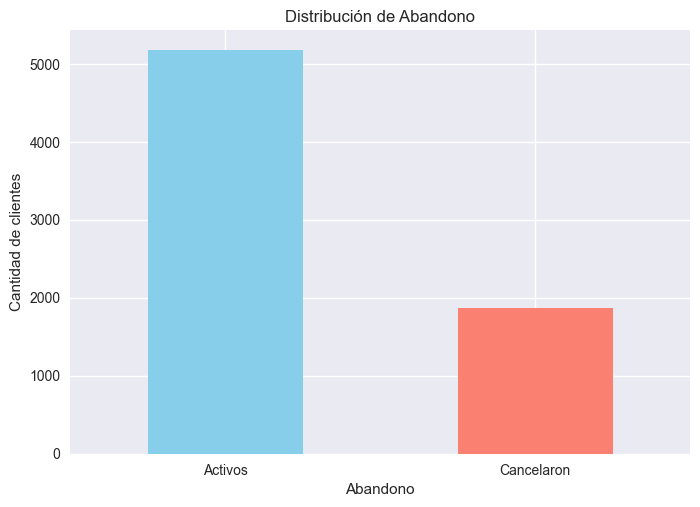

In [52]:

conteo_clases.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Abandono')
plt.xticks([0, 1], ['Activos', 'Cancelaron'], rotation=0)
plt.ylabel('Cantidad de clientes')
plt.show()


## **5. Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

Detectar si hay escalas muy diferentes

In [61]:
# Seleccionamos solo las columnas numéricas
num_cols = df_codificado.select_dtypes(include=['int64', 'float64']).columns

# Resumen estadístico para ver rangos
df_codificado[num_cols].describe()


,Abandono,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Seguridad_Linea,Respaldo_Linea,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.467065,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.498953,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Normalización alternativa (0-1)

In [62]:
from sklearn.preprocessing import StandardScaler

# Copia de los datos numéricos
X_num = df_codificado[num_cols].drop(columns=['Abandono'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Convertimos a DataFrame para verlo mejor
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled_df.head()


,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Seguridad_Linea,Respaldo_Linea,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,-0.439916,1.034530,1.529024,-0.951682,0.327438,-0.936163,-0.759728,1.127522,-0.884620,1.303503,1.018847,-0.990439,0.829798,0.027862,-0.745607,0.027862
1,-0.439916,-0.966622,-0.654012,-0.951682,0.327438,1.068190,-0.759728,-0.886901,-0.884620,-0.767164,-0.981502,1.009653,-1.205113,-0.161583,-0.768063,-0.161583
2,-0.439916,-0.966622,-0.654012,-1.155283,0.327438,-0.936163,-0.759728,-0.886901,1.130429,-0.767164,-0.981502,-0.990439,0.829798,0.303720,-0.883456,0.303720
3,2.273159,1.034530,-0.654012,-0.788800,0.327438,-0.936163,-0.759728,1.127522,1.130429,-0.767164,1.018847,1.009653,0.829798,1.104706,-0.461240,1.104706
4,2.273159,1.034530,-0.654012,-1.196004,0.327438,-0.936163,-0.759728,-0.886901,-0.884620,1.303503,1.018847,-0.990439,0.829798,0.636080,-0.889390,0.636080


# **Correlación y Selección de Variables🎯**

## **1. Análisis de correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [63]:
# Selección de variable snuméricas:

# Seleccionamos solo las columnas numéricas (incluyendo Abandono)
num_cols = df_codificado.select_dtypes(include=['int64', 'float64']).columns
df_num = df_codificado[num_cols]

df_num.head()

,Abandono,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Seguridad_Linea,Respaldo_Linea,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0,0,1,1,9,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,65.6,593.30,2.186667
1,0,0,0,0,9,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,59.9,542.40,1.996667
2,1,0,0,0,4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,73.9,280.85,2.463333
3,1,1,1,0,13,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,98.0,1237.85,3.266667
4,1,1,1,0,3,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,83.9,267.40,2.796667


In [64]:
# Calculando la matriz de correlación

# Matriz de correlación
corr_matrix = df_num.corr()

# Mostrar correlación con Abandono, ordenada
corr_abandono = corr_matrix["Abandono"].sort_values(ascending=False)
print(corr_abandono)


Abandono               1.000000
Cargo_Mensual          0.193356
Cargo_Diario           0.193356
Factura_Digital        0.191825
Adulto_Mayor           0.150889
Lineas_Multiples       0.040207
Servicio_Telefonico    0.011942
Tv_Streaming          -0.037057
Peliculas_Streaming   -0.040132
Con_Pareja            -0.150448
Dependientes          -0.164221
Proteccion_Equipo     -0.177125
Respaldo_Linea        -0.196061
Cargo_Total           -0.199484
Soporte_Tecnico       -0.274422
Seguridad_Linea       -0.280816
Antiguedad            -0.352229
Name: Abandono, dtype: float64


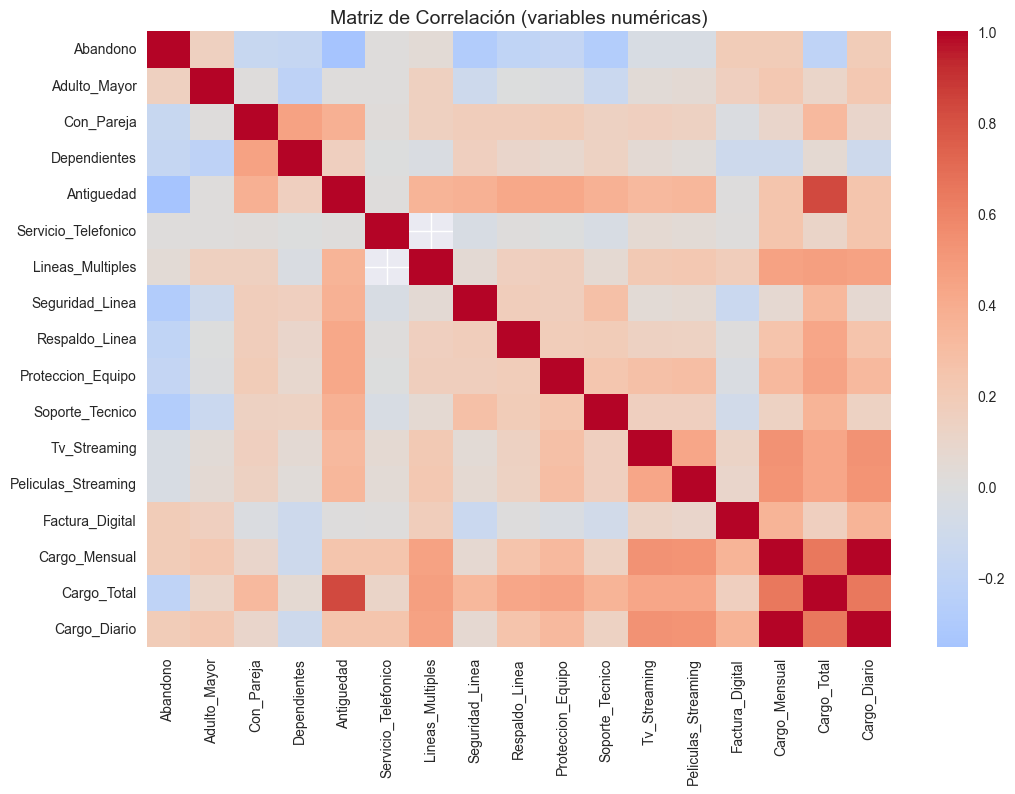

In [65]:
# Visualizar con mapa de calor

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación (variables numéricas)", fontsize=14)
plt.show()


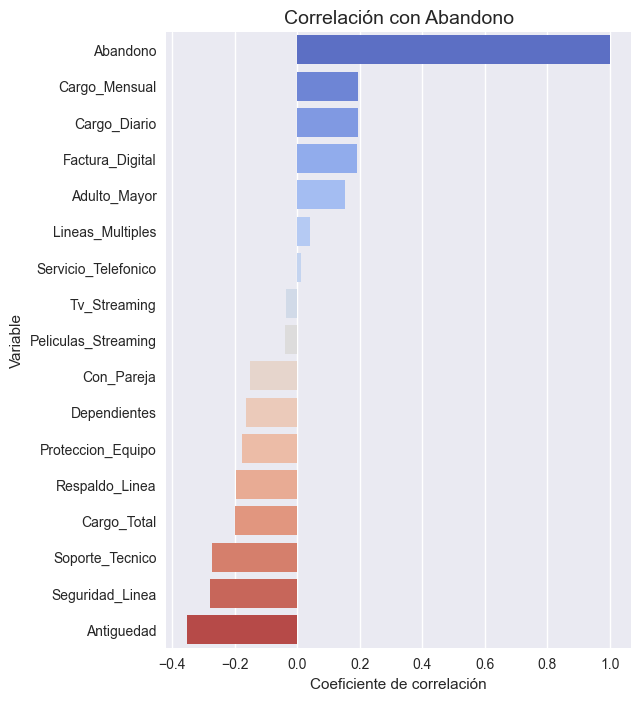

In [67]:
# Visualizar solo correlaciones con Abandono

plt.figure(figsize=(6,8))
sns.barplot(
    y=corr_abandono.index,
    x=corr_abandono.values,
    palette="coolwarm"
)
plt.title("Correlación con Abandono", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.show()


## **2. Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

* Tiempo de contrato × Cancelación

* Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

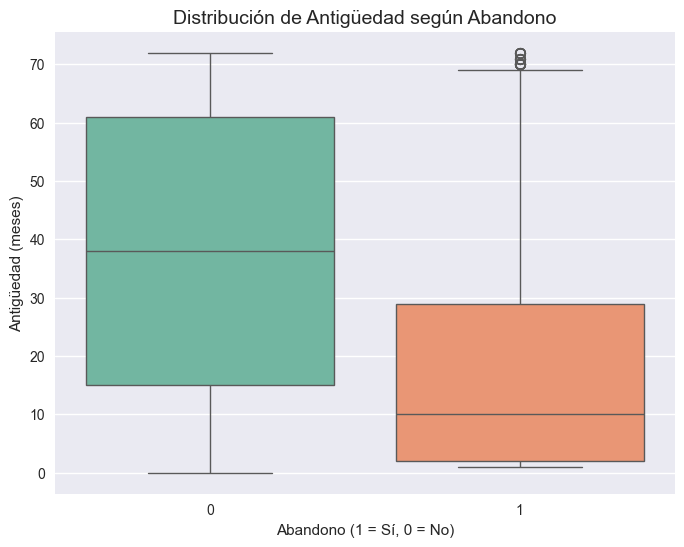

In [68]:
# Boxplot: Tiempo de contrato × Cancelación

plt.figure(figsize=(8,6))
sns.boxplot(x="Abandono", y="Antiguedad", data=df, palette="Set2")
plt.title("Distribución de Antigüedad según Abandono", fontsize=14)
plt.xlabel("Abandono (1 = Sí, 0 = No)")
plt.ylabel("Antigüedad (meses)")
plt.show()


>👉 Si los clientes con poca antigüedad aparecen más en Abandono=1, eso indica que los nuevos clientes cancelan más.

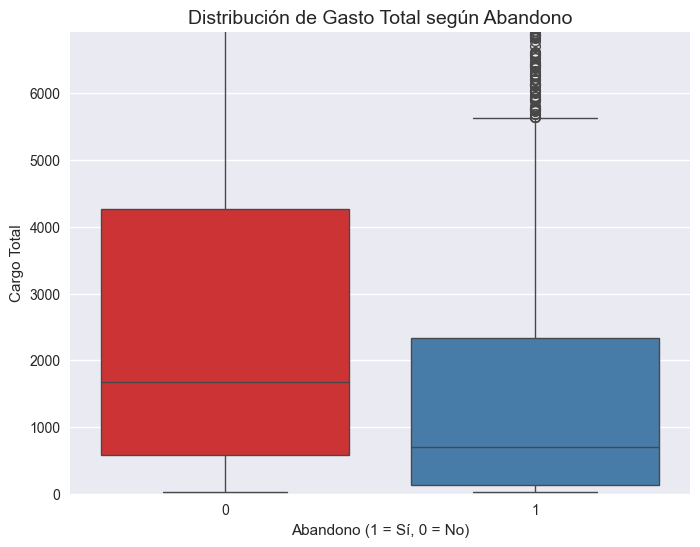

In [69]:
#Boxplot: Gasto Total × Cancelación

plt.figure(figsize=(8,6))
sns.boxplot(x="Abandono", y="Cargo_Total", data=df, palette="Set1")
plt.title("Distribución de Gasto Total según Abandono", fontsize=14)
plt.xlabel("Abandono (1 = Sí, 0 = No)")
plt.ylabel("Cargo Total")
plt.ylim(0, df_codificado["Cargo_Total"].quantile(0.95))  # limitar a percentil 95 para evitar outliers extremos
plt.show()


>👉 Si los que cancelan tienen gasto total bajo, puede indicar que se van pronto.
Si es alto, indica que incluso clientes leales terminan cancelando.

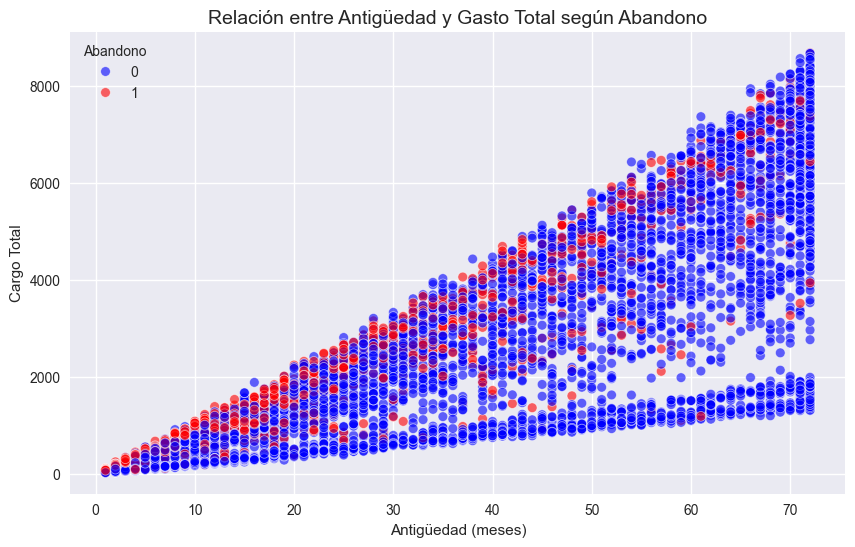

In [70]:
# Scatter Plot: Gasto Total vs Antigüedad (coloreado por Cancelación)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_codificado, 
    x="Antiguedad", 
    y="Cargo_Total", 
    hue="Abandono", 
    palette={0:"blue", 1:"red"}, 
    alpha=0.6
)
plt.title("Relación entre Antigüedad y Gasto Total según Abandono", fontsize=14)
plt.xlabel("Antigüedad (meses)")
plt.ylabel("Cargo Total")
plt.show()


>👉 Aquí podrás ver:

>*   Clientes que se fueron pronto (baja antigüedad + bajo gasto total).

>*   Clientes que se quedaron mucho tiempo pero también cancelaron (alta antigüedad + alto gasto total).

# **Modelado Predictivo🤖**

## **1. Separación de datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [71]:
# Separar variables predictoras (X) y variable objetivo (y)
# la variable a predecir es Abandono (1 = canceló, 0 = sigue activo).

# Definir X (features) y y (target)
X = df_codificado.drop("Abandono", axis=1)
y = df_codificado["Abandono"]


In [72]:
# División entrenamiento / prueba
# Aquí probamos con una división 70% entrenamiento / 30% prueba.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,      # 30% prueba
    random_state=42,    # reproducibilidad
    stratify=y          # mantiene la proporción de clases
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (4930, 24)
Tamaño del conjunto de prueba: (2113, 24)


In [73]:
# Revisar la distribución en cada conjunto
# Para confirmar que el balance de clases se conserva:

print("Proporción en y_train:")
print(y_train.value_counts(normalize=True))

print("\nProporción en y_test:")
print(y_test.value_counts(normalize=True))


Proporción en y_train:
Abandono
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Proporción en y_test:
Abandono
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## **2. Creación de Modelos**

Excelente, ahora vamos a construir dos modelos predictivos distintos para la cancelación de clientes ⚡.

* Modelo 1 (con normalización): Regresión Logística

* Modelo 2 (sin normalización): Árbol de Decisión

Así cubrimos ambas perspectivas ✅.

In [74]:
# Primero separamos las variables predictoras (X) y la variable objetivo (y).



# Separar features y target
X = df_codificado.drop("Abandono", axis=1)
y = df_codificado["Abandono"]

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [80]:
# Modelo 1: Regresión Logística (requiere normalización)



# Pipeline: imputación + normalización + modelo
pipeline_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # imputar NaN con la mediana
    ("scaler", StandardScaler()), 
    ("log_reg", LogisticRegression(random_state=42, max_iter=1000))
])

# Entrenamiento
pipeline_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = pipeline_lr.predict(X_test)

print("📊 Modelo 1: Regresión Logística (con imputación + normalización)")
print(classification_report(y_test, y_pred_lr))



📊 Modelo 1: Regresión Logística (con imputación + normalización)
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [83]:
# Modelo 2: Árbol de Decisión (no requiere normalización)
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el árbol
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

print("📊 Modelo 2: Árbol de Decisión (sin normalización)")
print(classification_report(y_test, y_pred_tree))


📊 Modelo 2: Árbol de Decisión (sin normalización)
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.62      0.52      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



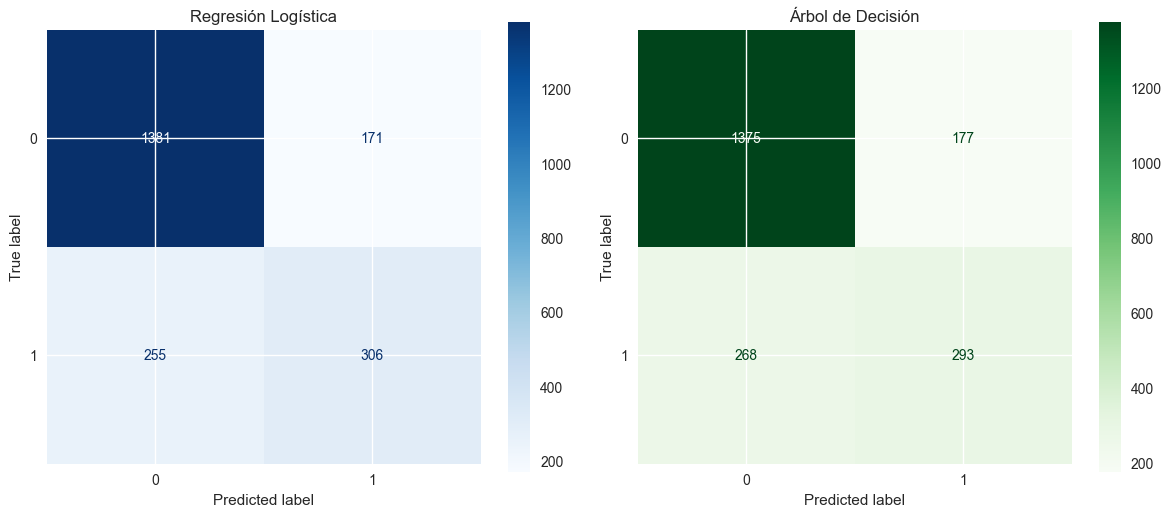

In [82]:
# Comparación gráfica de desempeño

from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Matriz de confusión Regresión Logística
ConfusionMatrixDisplay.from_estimator(
    pipeline_lr, X_test, y_test, cmap="Blues", ax=axes[0]
)
axes[0].set_title("Regresión Logística")

# Matriz de confusión Árbol de Decisión
ConfusionMatrixDisplay.from_estimator(
    tree, X_test, y_test, cmap="Greens", ax=axes[1]
)
axes[1].set_title("Árbol de Decisión")

plt.tight_layout()
plt.show()


In [88]:
df_codificado.isnull().sum()

Abandono                                  0
Adulto_Mayor                              0
Con_Pareja                                0
Dependientes                              0
Antiguedad                                0
Servicio_Telefonico                       0
Lineas_Multiples                        682
Seguridad_Linea                        1526
Respaldo_Linea                         1526
Proteccion_Equipo                      1526
Soporte_Tecnico                        1526
Tv_Streaming                           1526
Peliculas_Streaming                    1526
Factura_Digital                           0
Cargo_Mensual                             0
Cargo_Total                              11
Cargo_Diario                              0
Genero_Male                               0
Internet_Tipo_Fiber optic                 0
Internet_Tipo_No                          0
Tipo_Contrato_One year                    0
Tipo_Contrato_Two year                    0
Metodo_Pago_Credit card (automat

In [89]:
df_codificado = df_codificado.dropna()

## **3. Evaluación de Modelos**


🔹 Resultados para Regresión Logística:
Accuracy : 0.7648275862068965
Precision: 0.65807962529274
Recall   : 0.5903361344537815
F1-score : 0.6223698781838317

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       974
           1       0.66      0.59      0.62       476

    accuracy                           0.76      1450
   macro avg       0.73      0.72      0.73      1450
weighted avg       0.76      0.76      0.76      1450



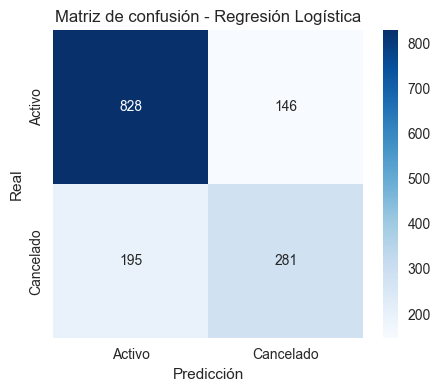


🔹 Resultados para Árbol de Decisión:
Accuracy : 0.7496551724137931
Precision: 0.6514745308310992
Recall   : 0.5105042016806722
F1-score : 0.5724381625441696

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       974
           1       0.65      0.51      0.57       476

    accuracy                           0.75      1450
   macro avg       0.72      0.69      0.70      1450
weighted avg       0.74      0.75      0.74      1450



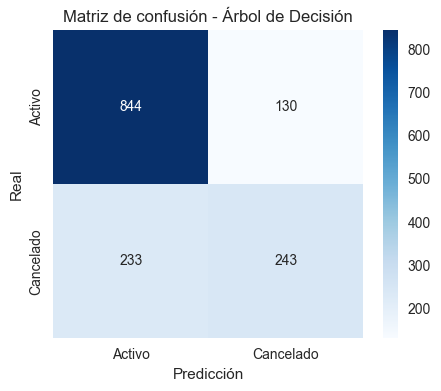

In [90]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



# 1. División en entrenamiento y prueba

X = df_codificado.drop("Abandono", axis=1)   # Ajusta el nombre de la variable objetivo
y = df_codificado["Abandono"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 2. Modelo 1: Regresión Logística (con normalización)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)


# 3. Modelo 2: Árbol de Decisión (sin normalización)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)


# 4. Función para evaluar los modelos

def evaluar_modelo(nombre, y_test, y_pred):
    print(f"\n🔹 Resultados para {nombre}:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Activo", "Cancelado"], yticklabels=["Activo", "Cancelado"])
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# 5. Evaluación de ambos modelos

evaluar_modelo("Regresión Logística", y_test, y_pred_log)
evaluar_modelo("Árbol de Decisión", y_test, y_pred_tree)


# **Interpretación y Conclusiones📋**

## **1. Análisis de la Importancia de las Variables**

Regresión Logística → Coeficientes

La regresión logística genera un coeficiente para cada variable.

* Si el coeficiente es positivo → aumenta la probabilidad de cancelación.

* Si es negativo → disminuye la probabilidad de cancelación.

* La magnitud indica la fuerza de la relación.

In [94]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [95]:
coef = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": logistic_model.coef_[0]
})
coef["Impacto (odds ratio)"] = np.exp(coef["Coeficiente"])
coef.sort_values(by="Coeficiente", ascending=False)

,Variable,Coeficiente,Impacto (odds ratio)
17,Internet_Tipo_Fiber optic,0.723075,2.060761
22,Metodo_Pago_Electronic check,0.350700,1.420061
12,Factura_Digital,0.321405,1.379063
0,Adulto_Mayor,0.213766,1.238333
5,Lineas_Multiples,0.195238,1.215601
10,Tv_Streaming,0.154057,1.166558
11,Peliculas_Streaming,0.106809,1.112721
23,Metodo_Pago_Mailed check,0.094366,1.098962
13,Cargo_Mensual,0.004098,1.004106
14,Cargo_Total,0.000398,1.000398


KNN → Influencia de los vecinos

KNN no da importancia directa a las variables, pero puedes:

* Evaluar cómo cambia la predicción cuando normalizas o excluyes variables.

* Usar permutation importance para medir cuánto se degrada el modelo si alteramos una variable:

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo
knn_model = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar n_neighbors
knn_model.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [99]:
from sklearn.inspection import permutation_importance


# Calcular importancia de variables con Permutation Importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

importance_knn = pd.DataFrame({
    "Variable": X_test.columns,
    "Importancia": result.importances_mean
}).sort_values(by="Importancia", ascending=False)

print(importance_knn)


                               Variable  Importancia
14                          Cargo_Total     0.136138
13                        Cargo_Mensual     0.040897
3                            Antiguedad     0.010828
5                      Lineas_Multiples     0.001379
9                       Soporte_Tecnico     0.001310
0                          Adulto_Mayor     0.000897
7                        Respaldo_Linea     0.000759
8                     Proteccion_Equipo     0.000552
22         Metodo_Pago_Electronic check     0.000483
6                       Seguridad_Linea     0.000207
18                     Internet_Tipo_No     0.000000
21  Metodo_Pago_Credit card (automatic)     0.000000
11                  Peliculas_Streaming     0.000000
20               Tipo_Contrato_Two year     0.000000
4                   Servicio_Telefonico     0.000000
15                         Cargo_Diario     0.000000
19               Tipo_Contrato_One year     0.000000
17            Internet_Tipo_Fiber optic     0.

Random Forest → Feature Importance

Random Forest calcula automáticamente la importancia de las variables en función de cómo reducen la impureza en los árboles.

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(
    n_estimators=100,     # número de árboles
    random_state=42,      # reproducibilidad
    max_depth=None,       # profundidad máxima (puedes ajustar)
)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [103]:
# Importancia de variables
importancias = rf_model.feature_importances_

forest_importance = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

print(forest_importance.head(10))  # muestra las 10 más importantes


                        Variable  Importancia
14                   Cargo_Total     0.171369
3                     Antiguedad     0.158054
13                 Cargo_Mensual     0.135138
15                  Cargo_Diario     0.134342
17     Internet_Tipo_Fiber optic     0.032054
20        Tipo_Contrato_Two year     0.031583
6                Seguridad_Linea     0.031577
22  Metodo_Pago_Electronic check     0.029758
9                Soporte_Tecnico     0.028562
16                   Genero_Male     0.026008


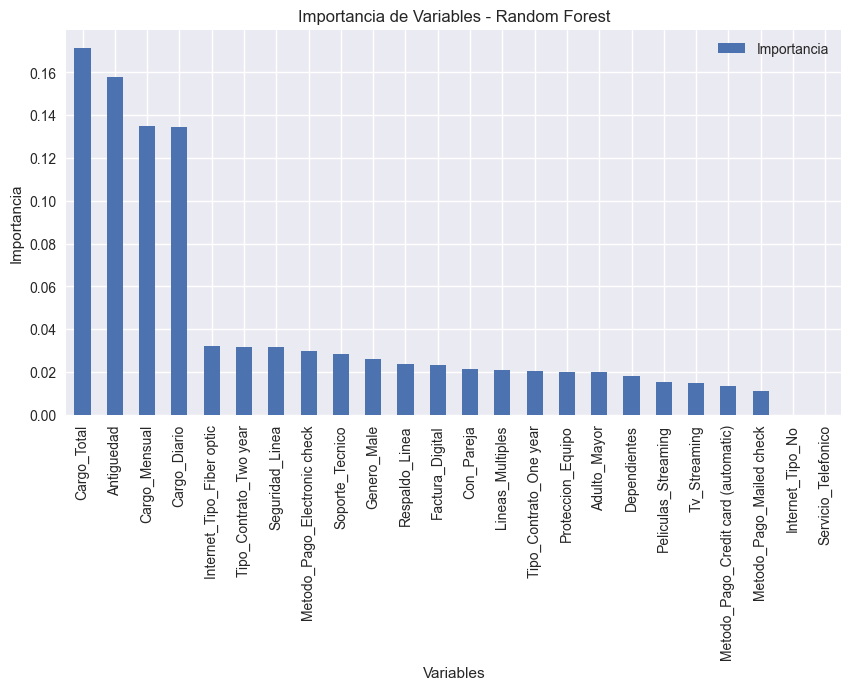

In [104]:
forest_importance.plot(kind="bar", x="Variable", y="Importancia", figsize=(10,5))
plt.title("Importancia de Variables - Random Forest")
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.show()


## **2. Análisis de la Importancia de las Variables**

**Informe de Churn – Telecom X (Parte 2)**

* Principales causas del churn:

    * Antiguedad baja: Los clientes recientes precentan mayor riezo de abandono
    * Los tipos de contrato "Month-to-month" presentan mayor abandono frente a "One/Two year"
    * Los clientes con metodo de pago como "Electronic check", mayor riezgo de abandono
    * Pagos automáticos, menor riezgo
    * Los clientes que no cuentan con servicios de respaldo (Seguridad / soporte / respaldo) tiene mayor incidencia de abandono.

* Recomendaciones:

    * Aplicar ofertas de permanencia a clientes con tipo de contrado "Month_to_month" con alta tarifa.
    * Campañas para migrar de contratos "month to month" a "one/two year" con precios preferentes.
    * Optimizar la estructura de precios para cargos mensulaes altos, agregando valor sin subir la percepción de precios altos. Enfocado en clientes con servicio de "fiber optic"

* Conclusión general:

> Los resultados del modelo dan a entender que la antiguedad, el tipo de contrato, el cargo mensual, el metodo de pago y la adopción de servicios de valor agregado son las prioncipales caudas del churn del cliente.

>Las medidas para evitar el abandono del cliente tienen que estar enficados en aquellos clientes uevos que presentan contratos mensuales y cargos altos, promoviendo beneficios y facilidades para acceder a contratos más largos con faciliades de pagos automáticos.
